In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

### Load Filtered Data One

In [2]:
df1_filtered = pd.read_csv("asserts/df1_filtered.csv")

In [3]:
df1_filtered.head(5)

,State,County,City,Make,Model,ModelYear,EVType,ElectricRange,BasePrice
0,WA,King,Seattle,BMW,X5,2023,PHEV,30,0
1,WA,Yakima,Moxee,FORD,ESCAPE,2022,PHEV,38,0
2,WA,King,Seattle,CHEVROLET,BOLT EV,2018,BEV,238,0
3,WA,King,Newcastle,TESLA,MODEL S,2013,BEV,208,69900
4,WA,Kitsap,Bremerton,FORD,C-MAX,2015,PHEV,19,0


## Outliers in Electric Range Aanlysis

Conduct a comprehensive examination of the ElectricRange, focusing intently on both extremities—namely the zero values and the elevated numbers. This in-depth analysis will pave the way for informed conclusions and subsequent actions.

Employ a range of visual aids and engage in multifaceted cross-variable analyses to unearth profound insights, ensuring that the derived conclusions are well-supported and robust.

In [4]:
df1_filtered["ElectricRange"].value_counts().head(10)

ElectricRange
0      63875
215     6463
220     4142
84      4036
238     3548
25      3483
21      2614
32      2543
208     2535
19      2526
Name: count, dtype: int64

#### Findings on `ElectricRange` Value Counts:

- **Zero Range Observations:** 
  A remarkable section of the dataset is characterized by an `ElectricRange` of `0`. Specifically, there are `63,875` entries with this attribute. The prominence of such entries suggests potential data patterns or areas for further investigation.


In [5]:
df1_filtered["ElectricRange"].describe()

count    143359.000000
mean         70.486757
std          97.120983
min           0.000000
25%           0.000000
50%          19.000000
75%         111.000000
max         337.000000
Name: ElectricRange, dtype: float64

#### Findings on `ElectricRange` Value Distribution:

- **Median Insight:** 
  Half of the data points, or 50%, possess an `ElectricRange` value of `19` or lower.

- **Maximum Value:** 
  The dataset reaches a peak `ElectricRange` of `337`, pointing to some extreme values or potential outliers.

- **Variability:** 
  The considerable standard deviation underscores a pronounced variability in the `ElectricRange`. This means the values are spread out and can deviate significantly from the mean.

Given the observed variability and the stark difference between the median and the maximum, a deeper analysis might be warranted to understand the reasons or potential outliers behind such dispersion.


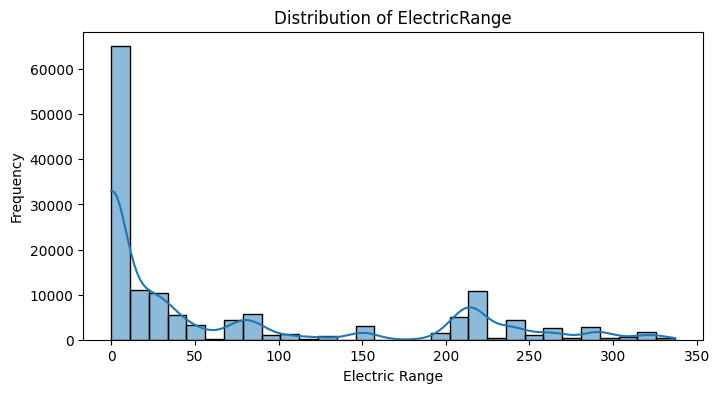

In [6]:
# Visualizing the distribution of the electric range

plt.figure(figsize=(8, 4))
sns.histplot(df1_filtered["ElectricRange"], kde=True, bins=30)
plt.title("Distribution of ElectricRange")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.show()

#### Findings on `ElectricRange` Distribution:

- **Dominance of Zero Range:** 
  The dataset reveals a stark dominance of the `zero electric range` with a substantial `60,000+` entries. This magnitude is far greater than any other range value in the dataset.

- **Comparison with Non-Zero Ranges:** 
  In juxtaposition, every non-zero `ElectricRange` value is comparatively infrequent, each with less than `10,000` instances.

- **Data Imbalance:** 
  The pronounced skewness towards zero electric range leads to a significant imbalance in the distribution of values. Such disparity could impact analyses and models and necessitates consideration in further evaluations.


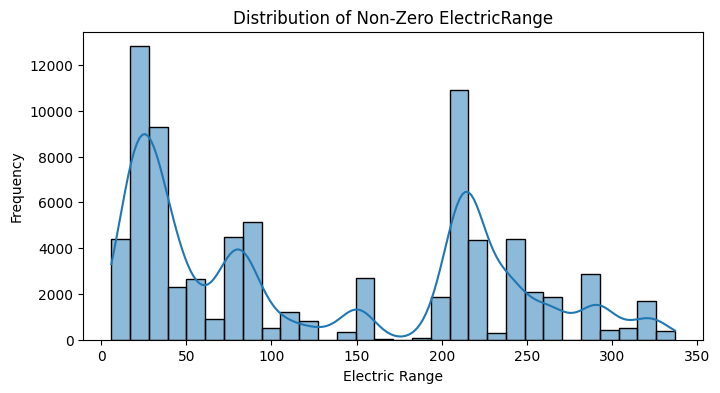

In [7]:
# exclude the zero value and only focus on the rest of the distribution
plt.figure(figsize=(8, 4))
sns.histplot(
    df1_filtered[df1_filtered["ElectricRange"] > 0]["ElectricRange"], kde=True, bins=30
)
plt.title("Distribution of Non-Zero ElectricRange")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.show()

#### Findings from `ElectricRange` Histogram Analysis:

##### **Focus on Non-Zero Ranges:**
Given the histogram tailored exclusively to non-zero `ElectricRange` values, several key insights emerge:

- **Prominent Bifurcation:** 
  The frequency distribution clearly bifurcates into two dominant clusters:
  - A range around the `20` mark registers a heightened frequency, surpassing `12,000` instances.
  - A second cluster encircling the `200` mark is evident with a frequency exceeding `10,000`.

- **Intervening Ranges:** 
  Between these primary clusters, there's a scattering of data bins with notable but lesser concentrations:
  - Roughly `six bins` are discerned to have frequencies ranging between `2,000` and `5,000`.
  - These bins resonate within specific electric range segments, namely: sub-`20`, `80` to `90`, around `220`, `250`, and nearing `290`.

- **Subdued Presence:** 
  Most other bins within the histogram exhibit a more muted presence, each with frequencies falling below `2,000` instances.

The analysis underscores the intricate patterns and clusters present in the electric ranges and hints at possible segmentations or groupings within the data.


In [8]:
# detect outliers in "ElectricRange" column using IQR method
Q1 = df1_filtered["ElectricRange"].quantile(0.25)
Q3 = df1_filtered["ElectricRange"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df1_filtered[
    (df1_filtered["ElectricRange"] < lower_bound)
    | (df1_filtered["ElectricRange"] > upper_bound)
]
print("Outliers in Electric Range:")
print(outliers["ElectricRange"])

Outliers in Electric Range:
15        293
67        322
71        293
76        289
81        291
         ... 
143237    289
143277    293
143298    291
143350    291
143352    291
Name: ElectricRange, Length: 5925, dtype: int64


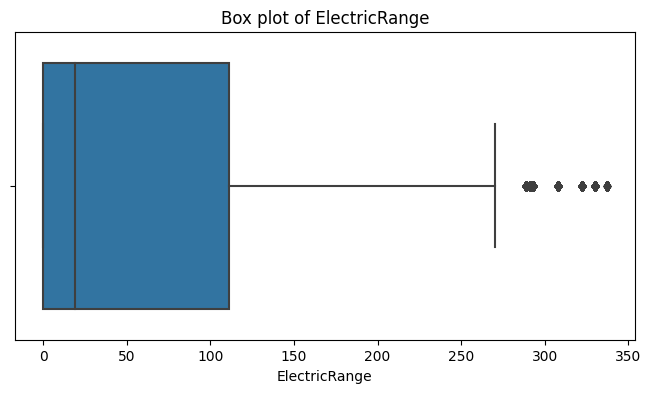

In [9]:
# visualize the outliers using a Box Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df1_filtered["ElectricRange"])
plt.title("Box plot of ElectricRange")
plt.show()

#### Outlier Analysis of `ElectricRange`:

#### **IQR Method Insights:**
Leveraging the Interquartile Range (IQR) method to ascertain outliers within the `ElectricRange` variable provides valuable insights:

- **Presence of Outliers:** 
  The boxplot elucidates a marked presence of outliers, suggesting non-trivial deviations from the main data cluster.

- **Dataset Variability:** 
  Such a conspicuous number of outliers underscores a significant degree of variability and deviation inherent in the dataset.

The observations highlight the importance of recognizing and potentially addressing these outliers, especially when undertaking subsequent analyses or modeling exercises.


### Analyzing the Zero Values

Considering the findings above, the initial step is to scrutinize the rows with zero values in the 'ElectricRange' variable. It is imperative to ascertain whether a value of 0 represents instances of missing or unrecorded data, or if it constitutes a legitimate value indicative of vehicles possessing no electric range, potentially corresponding to certain hybrid vehicle models

In [10]:
# filter out zero value rows
zero_range = df1_filtered[df1_filtered["ElectricRange"] == 0]

# Explore the characteristics of these rows, ('EVType', 'Make', 'Model', 'ModelYear')

checking_columns = ["Make", "Model", "ModelYear", "EVType"]
for column in checking_columns:
    print(f"{column}")
    print(zero_range[column].value_counts())

Make
Make
TESLA            39708
FORD              3351
CHEVROLET         3053
VOLKSWAGEN        2834
KIA               2501
NISSAN            2289
RIVIAN            2208
HYUNDAI           2140
VOLVO             1121
BMW               1101
AUDI               939
MERCEDES-BENZ      608
MINI               438
SUBARU             438
POLESTAR           371
PORSCHE            315
LUCID              176
TOYOTA              96
GENESIS             88
CADILLAC            49
JAGUAR              27
LEXUS               24
Name: count, dtype: int64
Model
Model
MODEL Y             23901
MODEL 3             12689
ID.4                 2834
MUSTANG MACH-E       2429
LEAF                 2065
BOLT EV              1970
MODEL X              1721
EV6                  1561
IONIQ 5              1464
MODEL S              1397
R1T                  1314
BOLT EUV             1083
NIRO                  937
XC40                  794
F-150                 674
I4                    641
R1S                   611
KONA

### Interpretation of the exploration of the zero "ElectricRange" across various columns:

#### EV Type Consistency:

- All zero `ElectricRange` entries correspond exclusively to the `Battery Electric Vehicle (BEV)` type.

#### Make and Model:

- The majority of zero `ElectricRange` entries are linked with the Tesla brand, specifically the ‘Model Y’ and ‘Model 3’.

#### Temporal Consistency:

- The bulk of zero `ElectricRange` occurrences are found in the years 2021, 2022, and 2023.

#### Assumptions and Hypotheses:

- The strong correlation of zero `ElectricRange` entries with the Tesla brand, especially the ‘Model Y’ and ‘Model 3’, might be a reflection of Tesla's dominant position in the Electric Vehicle market. This suggests that the abundance of Tesla in the dataset could signify its broad acceptance and appeal to consumers, potentially resulting in an increased number of such entries.

- The accumulation of zeros in 2021, 2022, and 2023 hints at a regular trend during this period, possibly linked to shifts in manufacturing, documentation, or data collection methodologies.

- The exclusive presence of zero `ElectricRange` values within the `BEV` category might reveal a systematic tendency or a unique trait tied to BEVs in this dataset. This could be influenced by the manner in which the data is documented or presented.


### High Range Values Analysis

- **Maximum Value Insight:** 
  The peak value recorded is `337`. This is significantly greater than the 75th percentile value, which is `111`. This disparity underscores the presence of outliers skewing towards the higher end.

- **Significance of Analysis:** 
  Delving deep into high-range values is paramount. It's vital to discern whether these figures genuinely depict advanced vehicle models or merely represent anomalies in the dataset.


In [11]:
# filter out high range values
high_range = df1_filtered[df1_filtered["ElectricRange"] > upper_bound]

In [12]:
# examine the desceriptive stat of the high range values
print(high_range["ElectricRange"].describe())

count    5925.000000
mean      303.960506
std        15.549961
min       289.000000
25%       291.000000
50%       293.000000
75%       322.000000
max       337.000000
Name: ElectricRange, dtype: float64


#### Findings on High-Range Electric Values:

- **Average Electric Range:** 
  The mean electric range for the high-range segment stands at approximately `304`. This figure considerably eclipses the overall dataset's average, which is pegged at `70`.

- **Standard Deviation:** 
  The standard deviation measures around `15.55`, which is relatively modest. This signifies that the high-range values are concentrated and do not deviate significantly from the mean of `304`.

- **Distribution Insight:** 
  The minimal standard deviation indicates that these high-range electric values are tightly clustered, suggesting consistency in the performance of vehicles within this segment.


In [13]:
# Investigate the characteristics of vehicles with high electric range values,
# focusing on variables such as 'Make', 'Model', 'ModelYear', and 'EVType'.
for column in ["Make", "Model", "ModelYear", "EVType"]:
    print(high_range[column].value_counts())

Make
TESLA    5925
Name: count, dtype: int64
Model
MODEL Y    2255
MODEL 3    2209
MODEL X    1071
MODEL S     390
Name: count, dtype: int64
ModelYear
2020    5514
2019     411
Name: count, dtype: int64
EVType
BEV    5925
Name: count, dtype: int64


In [14]:
# Visualizing only the model and model year value counts since 
# the make and evtype both have a single value

# Using groupby to aggregate counts for each model-year combination
count_df = (high_range.groupby(['Model', 'ModelYear'])
                     .size()
                     .reset_index(name='Count'))

# Sorting the df to ensure that the bars are grouped correctly
count_df.sort_values(by=["Model", "ModelYear"], inplace=True)


C:\Users\SS\AppData\Local\Temp\ipykernel_9624\3306039483.py:70: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gs[0])


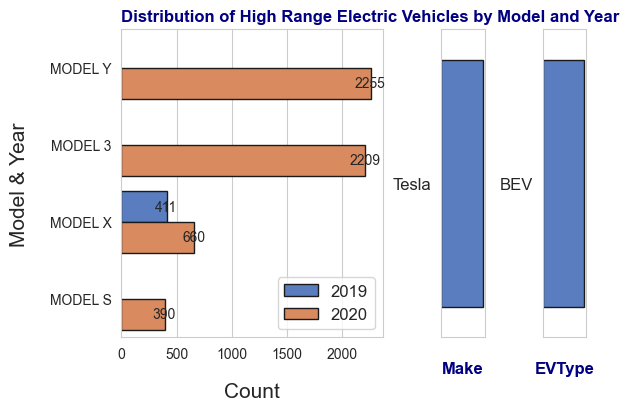

In [15]:
def plot_main_chart(count_df):
    """Plot main bar chart showing model counts by year."""
    barplot = sns.barplot(
        x="Count",
        y="Model",
        data=count_df,
        hue="ModelYear",
        errorbar=None,  # Instead of ci=None
        palette="muted",
        orient="h",
        edgecolor="0.1",
    )

    for p in barplot.patches:
        width = p.get_width()
        if not np.isfinite(width):  # Check if width is finite
            continue

        # Adjust the positioning of the annotations if they're getting plotted outside the figure
        position = 4 + width if width < ax.get_xlim()[1] - 4 else width - 4

        plt.text(
            position,
            p.get_y() + p.get_height() / 2,
            "{:1.0f}".format(width),
            ha="center",
            va="center",
        )

    plt.title(
        "Distribution of High Range Electric Vehicles by Model and Year",
        loc="left",
        fontsize=12,
        fontweight="bold",
        color="navy",
    )
    plt.xlabel("Count", fontsize=15, labelpad=15)
    plt.ylabel("Model & Year", fontsize=15, labelpad=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc="lower right", frameon=True, fontsize=12)


def plot_side_chart(value, label):
    """Plot side charts for Make and EVType."""
    sns.barplot(x=[1], y=[value], palette="muted", orient="h", edgecolor="0.1")
    ax = plt.gca()
    ax.text(
        0.5,
        -0.1,
        label,
        ha="center",
        va="center",
        fontsize=12,
        fontweight="bold",
        color="navy",
        transform=ax.transAxes,
    )
    ax.tick_params(axis="y", which="major", labelsize=12)
    ax.set_xticks([])
    ax.set_ylabel("")


# Plotting
sns.set_style("whitegrid")
sns.set_palette("pastel")
count_df.sort_values(by="Count", ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(6, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[6, 1, 1])

plt.subplot(gs[0])
plot_main_chart(count_df)

plt.subplot(gs[1])
plot_side_chart("Tesla", "Make")

plt.subplot(gs[2])
plot_side_chart("BEV", "EVType")

plt.subplots_adjust(wspace=0.5)
plt.show()

#### Findings:

- **Brand Association:** 
  The exclusive association of high-range values with `Tesla` vehicles underscores the brand's dominance in electric range capabilities, particularly in the specified models and model years. This observation concurs with the notion that Tesla, being a flagship in the electric vehicle arena, epitomizes high-performance standards.

- **BEV Representation:** 
  The consistent categorization of BEV as the `EVType` in high-range values highlights the intrinsic superiority of battery electric vehicles in attaining prolonged electric ranges.

- **Tesla's Position:** 
  This analysis further advocates the necessity to factor in the technological strides, market stratagem, and elite status of Tesla when decoding these expansive electric range figures.

- **Model Year Significance:** 
  The dominance of the `2020 model year` in the high-range spectrum implies potential enhancements incorporated during this period. This makes vehicles from this year especially significant for aficionados desiring optimal electric range.

- **Conclusion:** 
  In sum, these revelations can be instrumental for prospective customers, industry connoisseurs, and electric vehicle enthusiasts striving to comprehend the panorama of electric vehicle capacities and Tesla's unique propositions.
